# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = $$
$$= \mathbb{E}(aX - (X+\epsilon))^2 = \mathbb{E}((a-1)X+\epsilon)^2 = $$
$$=(a-1)^2\mathbb{E}(X)^2 + 2\mathbb{E}((a-1)X\epsilon) + \mathbb{E}(\epsilon)^2 = $$

where $ \mathbb{E}(X) = 0 $ and $ \mathbb{E}(\epsilon) = 0 $, and $ \mathbb{Var}(X) = 1 $, $ \mathbb{Var}(\epsilon) = \sigma^2$ and $X$ and $\epsilon$ are independent, therefore $\mathbb{E}(X)^2 = \mathbb{Var}(X) + (\mathbb{E}(X))^2 = 1$ and $\mathbb{E}(\epsilon)^2 = \mathbb{Var}(\epsilon) + (\mathbb{E}(\epsilon))^2 = \sigma^2$.


So continuing

$$ = (a-1)^2 + 2(a-1)\mathbb{E}(X)\mathbb{E}(\epsilon) + \sigma^2 = (a-1)^2 + \sigma^2$$

In [1]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [2]:
# sampling

import numpy as np
np.random.seed(7)

n = 50

X = np.random.standard_normal(size=n)
sigma = 1
epsilons = np.random.normal(size=n, scale=sigma)
Y = X + epsilons

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [3]:
def empirical_risk(a, x, y):
    return np.mean((a*x - y)**2)

### c)

In [4]:
# code, plot

In [5]:
a = np.linspace(-0.5, 2, 100)
emp_risk = [empirical_risk(ai, X, Y) for ai in a]
pop_risk = [population_risk(ai, sigma) for ai in a]

a_0 = 1
pop_risk_0 = population_risk(a_0, sigma)

In [6]:
# mimimum of the empirical risk function, scipy optimize minimize
from scipy.optimize import minimize

# optimize function empirical risk with respect to a
a_optimal = minimize(lambda a: empirical_risk(a, X, Y), 0).x[0]
a_optimal

1.3227646344869277

In [7]:
pop_risk_at_emp_min = population_risk(a_optimal, sigma)

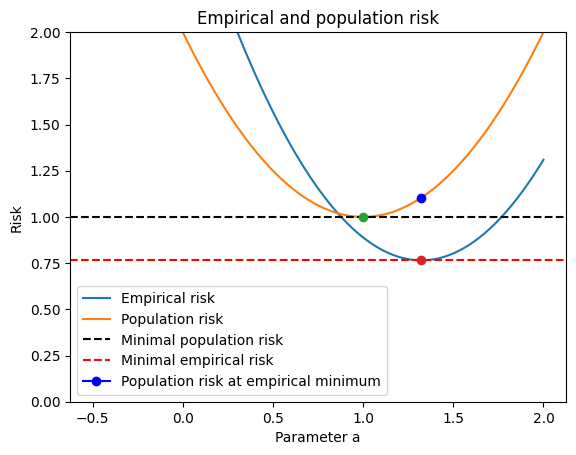

In [8]:
import matplotlib.pyplot as plt

plt.plot(a, emp_risk, label='Empirical risk')
plt.plot(a, pop_risk, label='Population risk')
plt.axhline(pop_risk_0, color='black', linestyle='--', label='Minimal population risk')
plt.axhline(empirical_risk(a_optimal, X, Y), color='red', linestyle='--', label='Minimal empirical risk')
plt.plot(a_optimal, pop_risk_at_emp_min, color='blue', marker='o', label='Population risk at empirical minimum')
plt.legend()
plt.plot(a_0, pop_risk_0, 'o')
plt.plot(a_optimal, empirical_risk(a_optimal, X, Y), 'o')
plt.xlabel('Parameter a')
plt.ylabel('Risk')
plt.ylim(0, 2)
plt.title('Empirical and population risk')
plt.show()

ERM - blue dot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [9]:
def generate_data(n, sigma):
    X = np.random.standard_normal(size=n)
    epsilons = np.random.normal(size=n, scale=sigma)
    Y = X + epsilons
    return X, Y

In [10]:
# excess risk

def excess_risk(x, y):
    a_empirical_minimum = minimize(lambda a: empirical_risk(a, x, y), 0).x[0]
    return population_risk(a_empirical_minimum, sigma) - population_risk(a_0, sigma)

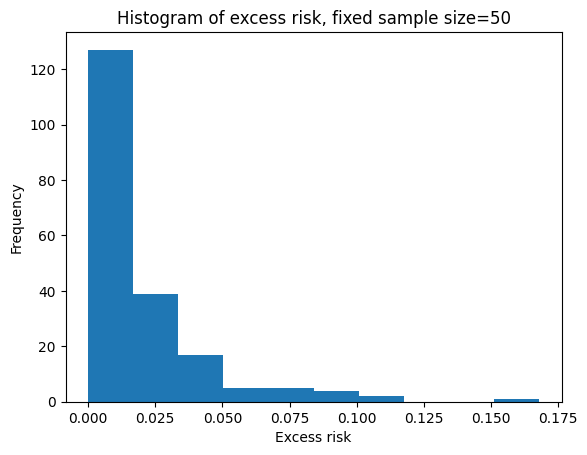

In [14]:
# simulations with fixed sample size

risks = []
for i in range(200):
    X, Y = generate_data(n, sigma)
    risks.append(excess_risk(X, Y))

plt.hist(risks)
plt.xlabel('Excess risk')
plt.ylabel('Frequency')
plt.title('Histogram of excess risk, fixed sample size=50')
plt.show()

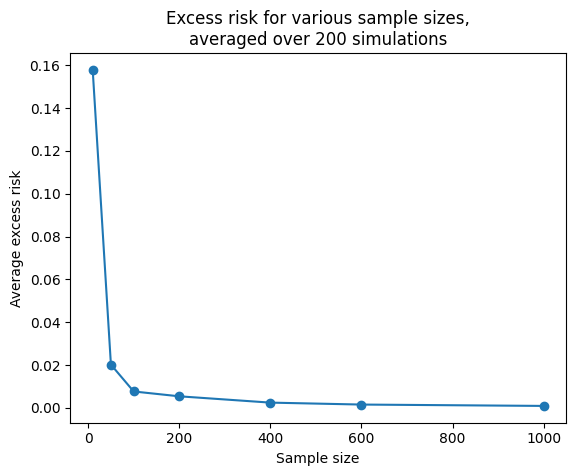

In [12]:
# simulations for various sample sizes

sizes = [10, 50, 100, 200, 400, 600, 1000]

average_risks = []
for s in sizes:
    risks = []
    for i in range(200):
        X, Y = generate_data(s, sigma)
        risks.append(excess_risk(X, Y))
    average_risks.append(np.mean(risks))

plt.plot(sizes, average_risks, 'o-')
plt.xlabel('Sample size')
plt.ylabel('Average excess risk')
plt.title('Excess risk for various sample sizes,\naveraged over 200 simulations')
plt.show()